In [2]:
import numpy as np
import pandas as pd
import re

# Data Manipulation with Pandas

    Vectorized String Operations
    Working with Time Series
    High-Performance Pandas: eval() and query()

## Vectorized String Operations

**Vectorization** of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done.

NumPy does not provide an easy way to work with string, but Pandas does through the **str** attribute of it's Series and Index objects.

In [2]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [3]:
#to capitalize all the names, simply call the str.capitalize method on the Series
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:

len(), lower(), translate(), islower(), ljust(), upper(), startswith(), isupper(), rjust(), find(), endswith(), isnumeric(), center(), rfind(), isalnum(), isdecimal(), zfill(), index(), isalpha(), split(), strip(), rindex(), isdigit(),	rsplit(), rstrip(),	capitalize(), isspace(), partition(), lstrip(), swapcase(), istitle(), rpartition()

You can see these by using tab after series.srt. and you can learn more about each using ?.

In [4]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [6]:
monte.str.lower() #returns series with string in lowercase

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [7]:
monte.str.len() #returns length of each string

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [8]:
monte.str.startswith('T') #return series of bool indicating if the string starts with T

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [9]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

Below are some methods using regular expressions;

**match():** Call re.match() on each element, returning a boolean.

**extract():** Call re.match() on each element, returning matched groups as strings.

**findall():** Call re.findall() on each element

**replace():** Replace occurrences of pattern with some other string

**contains():** Call re.search() on each element, returning a boolean

**count():** Count occurrences of pattern

**split():** Equivalent to str.split(), but accepts regexps

**rsplit():** Equivalent to str.rsplit(), but accepts regexps

This will extract the first name from each string by looking for the first contigous group of characters at the beginning of each string;

In [10]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the **start-of-string (^)** and **end-of-string ($)** regular expression characters:

In [11]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Below are some useful, miscellaneous methods;

**get():** Index each element

**slice():** Slice each element

**slice_replace():** Replace slice in each element with passed value

**cat():** Concatenate strings

**repeat():** Repeat values

**normalize():** Return Unicode form of string

**pad():** Add whitespace to left, right, or both sides of strings

**wrap():** Split long strings into lines with length less than a given width

**join():** Join strings in each element of the Series with passed separator

**get_dummies():**	extract dummy variables as a dataframe

The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3)

In [12]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

These get() and slice() methods also let you access elements of arrays returned by split(). For

In [13]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

The **get_dummies()** method is useful when your data has a column containing some sort of coded indicator.

For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [15]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


The get_dummies() routine lets you quickly split-out these indicator variables into a DataFrame:

In [16]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

Working with an open recipe database, downloaded from ~~http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz.~~ That line doesn't actually work, you can get it from here; https://s3.amazonaws.com/openrecipes/20170107-061401-recipeitems.json.gz.

Database is in JSON, so will try to use pd.read_json;

In [39]:
cd ..

/home/scott/ds/pythonDS_Handbook


In [40]:
try:
    recipes = pd.read_json('data/recipeitems.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


We can an error and it seems that it's due to using a file in which each line is itself a valid JSON, but the full file is not.

In [41]:
with open('data/recipeitems.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

Yes, apparently each line is a valid JSON, so we'll need to string them together. One way we can do this is to actually construct a string representation containing all these JSON entries, and then load the whole thing with pd.read_json:

In [43]:
# read the entire file into a Python array
with open('data/recipeitems.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [44]:
recipes.shape

(173278, 17)

So, we have about 17,000 recipes!

In [46]:
recipes.columns

Index(['_id', 'cookTime', 'creator', 'dateModified', 'datePublished',
       'description', 'image', 'ingredients', 'name', 'prepTime',
       'recipeCategory', 'recipeInstructions', 'recipeYield', 'source',
       'totalTime', 'ts', 'url'],
      dtype='object')

In [47]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

The ingredient list is in string format; we're going to have to carefully extract the information we're interested in. Let's start by taking a closer look at the ingredients:

In [49]:
recipes['ingredients'].str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [50]:
#longest ingredient list
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [53]:
#number of breakfast recipes
recipes.description.str.contains('[Bb]reakfast').sum() 
#the [Bb] ensures to include capitalized and noncapitalized versions of the word

3524

In [54]:
#recipes containing cinnamon
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [56]:
recipes.ingredients.str.contains('[Cc]inamon').sum()
#11 recipes mispell cinnamon, theyre missing that second n.

11

**Let's build a simple recipes recommender**

Given a list of ingredients, find a recipe that uses all those ingredients.

In [58]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [63]:
#builds a boolean df that indicates if an ingreidient in our spice list appears in a recipes list

spice_df = pd.DataFrame(dict((spice, recipes['ingredients'].str.contains(spice, re.IGNORECASE))
                            for spice in spice_list))

spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [65]:
#lets find a recipe that uses parsley, paprika, and tarragon.

selection = spice_df.query('parsley & paprika & tarragon')
selection #this is a boolean df that we can use as a mask

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
2069,False,False,True,True,True,False,False,False,True,False
74964,False,False,True,True,False,False,False,False,True,False
93768,False,False,True,True,True,False,True,True,True,False
113926,False,False,True,True,True,False,False,True,True,False
137686,False,False,True,True,True,False,False,True,True,False
140530,False,False,True,True,True,False,False,True,True,True
158475,True,False,True,True,True,False,False,True,True,False
158486,False,False,True,True,True,False,False,True,True,False
163175,False,True,True,True,True,False,False,True,True,False
165243,False,False,True,True,True,False,False,True,True,False


In [66]:
recipes['name'][selection.index] #this returns the name for only the matching indicies from our bool df

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

## Working with Time Series

Fun fact: Pandas was developed for financial modeling.

Date and time data comes in a few flavors, which we will discuss here:

+ **Time stamps** reference particular moments in time (e.g., July 4th, 2015 at 7:00am).


+ **Time intervals and periods** reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).


+ **Time deltas or durations** reference an exact length of time (e.g., a duration of 22.56 seconds).

Python's basic objects for working with dates and times reside in the built-in **datetime** module. Along with the third-party **dateutil** module, you can use it to quickly perform a host of useful functionalities on dates and times. 

In [68]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [69]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [70]:
#print day of the week
date.strftime('%A')

'Saturday'

The %A above syands for "Weekday as locale's full name" and more can be read about this sort of access directive at https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior.

There is also a time object from numpy, which fixes some of the optimization issues of Python's datetime, but it lacks convenient methods and functionality, so I'm going to skip it and go straight to the good stuff; Pandas **Timestamp** object.

From a group of these Timestamp objects, Pandas can construct a **DatetimeIndex** that can be used to index data in a Series or DataFrame.

In [71]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [72]:
date.strftime('%A') #still works

'Saturday'

In [74]:
date + pd.to_timedelta(np.arange(12), 'D') #adds 0-12 days to our date. The 'D' indicates day.

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [76]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data #the index is dates, you can see how this would be useful

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [78]:
data['2014-07-04':'2015-07-04'] #a range of dates can be used to index our data

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [79]:
#the slicing is smart as well, pass just the year, get all rows with that year in the index
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Let's quickly define time series data as a series of data points indexed in time order. Most commonly it is a sequence taken at successive equally spaced points in time. Therfore it is a sequence of discrete-time data.

Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.

Below are the fundamental Pandas data strctures for working with time series data;

+ For time stamps, Pandas provides the **Timestamp type**. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The **associated Index structure is DatetimeIndex**.


+ For time Periods, Pandas provides the **Period type**. This encodes a **fixed-frequency interval** based on numpy.datetime64. The **associated index structure is PeriodIndex**.


+ For time deltas or durations, Pandas provides the **Timedelta type**. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The **associated index structure is TimedeltaIndex**.

The most fundamental of these date/time objects are the **Timestamp** and **DatetimeIndex** objects. 

While these class objects can be invoked directly, it is more common to use the **pd.to_datetime()** function, which can parse a wide variety of formats. 

>*Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:*

In [80]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708']) 
#here we pass a list of dates
print(type(dates)) #so we get a DatetimeIndex
print(dates)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


Any DatetimeIndex can be converted to a PeriodIndex with the **to_period()** method with the addition of a frequency code; here we'll use 'D' to indicate daily frequency;

Other options for the freq parameter can be found at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [87]:
dates.to_period(freq='D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A **TimedealtaIndex** is created when a date is subtracted from another;

In [88]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: **pd.date_range() for timestamps**, **pd.period_range() for periods**, and **pd.timedelta_range() for time deltas**. 

**pd.date_range()** accepts a *start date*, an *end date*, and an optional *frequency code* to create a regular sequence of dates. By default, the frequency is one day:

In [89]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods, periods here refering to your freq, so by default it is the number of days;

In [90]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [91]:
pd.date_range('2015-07-03', periods=12, freq='H') #hourly timestamps over the course of 12 hours

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00', '2015-07-03 09:00:00',
               '2015-07-03 10:00:00', '2015-07-03 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [92]:
pd.period_range('2015-07', periods=8, freq='M') #creates 8 monthly periods

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [93]:
pd.timedelta_range(0, periods=10, freq='H') #sequence of durations increasiong by one hour 10 times.

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Pandas Frequency codes are linked above, but here they are summarized;


| **Code** | **Description**  |
| :---- | :-----------  |
| D	   | Calendar day |	
| W	   | Weekly		  |
| M	   | Month end	  |
| Q	   | Quarter end  |
| A	   | Year end	  |
| H	   | Hours	      |
| T	   | Minutes	  |
| S	   | Seconds	  |
| L	   | Milliseonds  |
| U	   | Microseconds |		
| N	   | nanoseconds  |	
| B	   | Business day |
| BM   | Business month end |
| BQ   | Business quarter end |
| BA   | Business year end |
| BH   | Business hours |
|MS	|Month start		
|QS	|Quarter start		
|AS	|Year start		
|BMS|	Business month start
|BQS|	Business quarter start
|BAS|	Business year start

You can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:
+ Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
+ A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

The split-point of the weekly frequency can also be modified by adding a three-letter weekday code:
+ W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [95]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [101]:
from pandas_datareader import data #the datereader module knows how to import financial data from a number of sources
#these include Yahoo, Google, and others

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo') #here we load googles closing price history
#we had to update the datasource because google is only allowing csv downloads now
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [102]:
goog = goog['Close'] #lets only look at the closing price

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

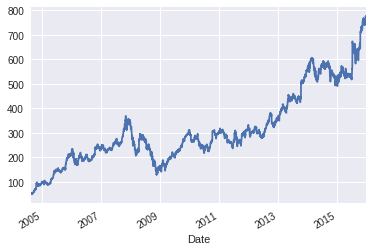

In [105]:
goog.plot(); #this semi-colon suppressed the matplotlib object text, neat!

One common need for time series data is **resampling** at a higher or lower frequency. 

The two types of resampling are:

+ **Upsampling:** Where you increase the frequency of the samples, such as from minutes to seconds.


+ **Downsampling:** Where you decrease the frequency of the samples, such as from days to months.

There are perhaps two main reasons why you may be interested in resampling your time series data:

+ **Problem Framing:** Resampling may be required if your data is not available at the same frequency that you want to make predictions.


+ **Feature Engineering:** Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model.

A feature engineering perspective may use observations and summaries of observations from both time scales and more in developing a model.

This resampling can be done using the **resample()** method, or the much simpler **asfreq()** method.

resample is a *data aggregation*, while asfreq is a *data selection*.

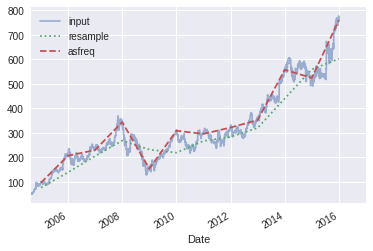

In [106]:
#lets resample the data at the end of the year

goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, **resample reports the average of the previous year**, while **asfreq reports the value at the end of the year**.

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. 

In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. 


Here, we will resample the business day data at a daily frequency (i.e., including weekends):

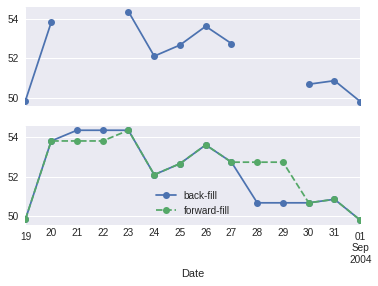

In [107]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') #backfill the up-sampled points
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') #frontfill the up-sampled points
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

Another common time series-specific operation is shifting of data in time. 

Pandas has two closely related methods for computing this: **shift()** and **tshift()**

+ shift() shifts the data
+ tshift() shifts the index. 

In both cases, the shift is specified in multiples of the frequency. Let's use both to shift by 900 days;

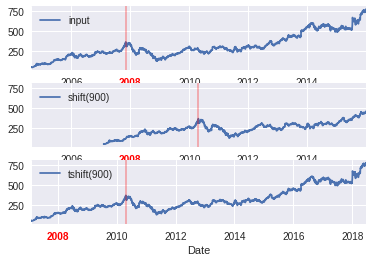

In [109]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while tshift(900) shifts the index values by 900 days.

You can see that in the tshift graph 2008 is shifted towards the left.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

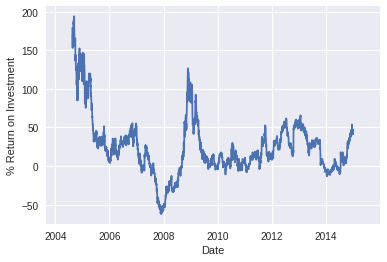

In [111]:
ROI = 100 * (goog.tshift(-365) / goog - 1) #if you bought the stock a year ago and then sold it a year later
ROI.plot()
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the **rolling()** attribute of Series and DataFrame objects.

A rolling analysis of a time series model is often used to assess the model’s stability over time.

A rolling average is a calculation to analyze data points by creating series of averages of different subsets of the full data set.

Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles. 

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

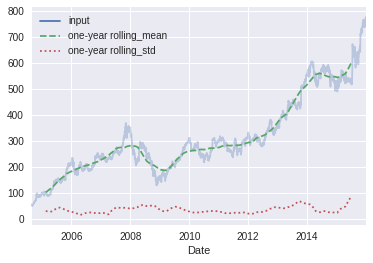

In [112]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Example: Visualizing Seattle Bicycle Counts

In [116]:
data = pd.read_csv('data/FB_Hourly_Bicycle_Counts_by_M_2012_on.csv', index_col = 'Date', parse_dates = True)
data.head() #this is the number of bikes on the Fremont Bridge in Seattle

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [117]:
data.columns = ['West', 'East'] #shorten names
data['Total'] = data.eval('West + East') #add total column

In [118]:
data.dropna().describe() #summary stats

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


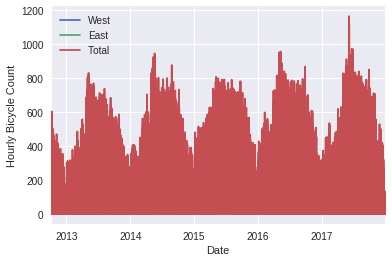

In [119]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

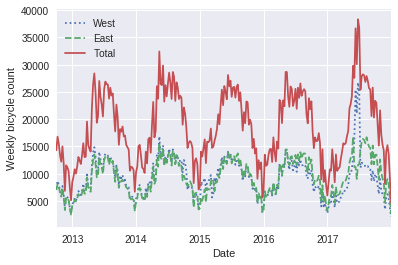

In [120]:
weekly = data.resample('W').sum() #resample the hourly samples as weekly samples
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count'); #much easier to see trends

Here we'll do a 30 day rolling mean of our data, making sure to center the window:

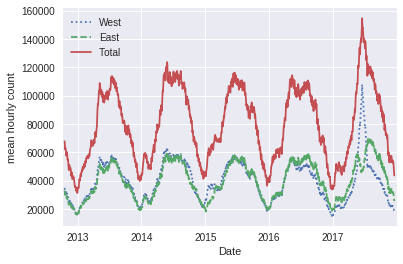

In [121]:
daily = data.resample('D').sum() #resample by day
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

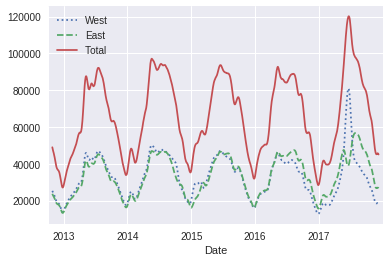

In [122]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

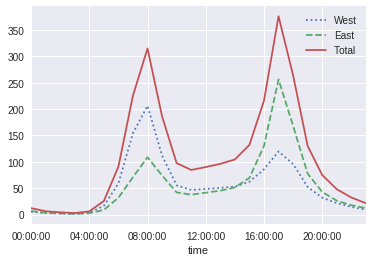

In [125]:
#average traffic as a function of the time of day.

by_time = data.groupby(data.index.time).mean() 
#group our data by time(which is hours, each group is an hour) and the find the average for each group(hour)
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

Here we can see the peaks around 8 a.m and 5 p.m, this is almost certianly people commuting to and from work.

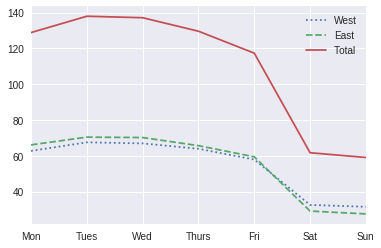

In [126]:
by_weekday = data.groupby(data.index.dayofweek).mean()
#group our data by day of the week, and find the average bikes on each day
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

As you might guess, less people are riding accross the bridge on the weekends.

In [127]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') 
#values of 5 and 6 indicate Saturday and Sunday in the index, so this just labels them as Weekday/Weekend based on
#the index number
by_time = data.groupby([weekend, data.index.time]).mean() #group by the type of day, as we indicated above
#then group by the time, which is the hour, and compute the mean of the hour on each type of day.

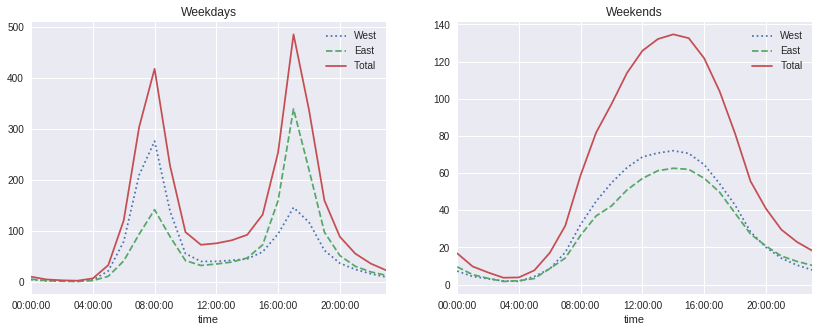

In [134]:
ig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);
#update these calls to .loc from .ix because .ix is deprecated.

Many more riders in the afternoon on the weekend, and an entirely different distribution, with only one peak instead of two.

## High-Performance Pandas: eval() and query()

Pandas includes some experimental tools that allow you to directly *access C-speed operations* without costly allocation of intermediate arrays. These are the **eval()** and **query()** functions, which rely on the Numexpr package. 

NumPy and Pandas support fast vectorized operation, such as adding the elements of two arrays. This abstraction becomes less efficient though when computing compound expressions. For example in the code below mask essential acts as the following;

`tmp1 = (x > 0.5)
 tmp2 = (y < 0.5)
 mask = tmp1 & tmp2`

In [3]:
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
mask = (x > 0.5) & (y < 0.5)

So, every intermediate step is allocated in the memory.

The **Numexpr** library gives you the ability to compute this compound expressing element by element. Essentially, you just pass a string of the NumPy-style expression you want to evaluate.

In [5]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr) #eturns True if two arrays are element-wise equal within a tolerance.

True

The key is this is calculated without creating full-size temporary arrays.

The Pandas **eval()** and **query()** tools are conceptually similar, and depend on the Numexpr package.

**eval()**  uses string expressions to efficiently compute operations on/using DataFrames.

In [7]:
#lets create 4 dataframes of random number each with 100000 rows and 100 columns
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [11]:
#compute sum of all 4 using typical Pandas approach
%timeit df1 + df2 + df3 + df4

10 loops, best of 3: 84.8 ms per loop


In [12]:
#compute using eval
%timeit pd.eval('df1 + df2 + df3 + df4') #about 50% faster!

10 loops, best of 3: 40 ms per loop


In [13]:
#let's make sure we're getting the same result though
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4')) #we are

True

**Let's journey down the rabbit hole of operations supported by eval()**

We'll use the following 5 integer dataframes, each is 100 rows with 3 columns filled with random integers between 0 and 1000.

In [18]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [19]:
#supports all arithmetic operators
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [20]:
#supports all comparison operators
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [21]:
#supports the bitwise operators & and |
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [22]:
#also support the literal and and or Boolean expressions
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [23]:
#access to attributes and indicies is supported using the standard syntax
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently not implemented in pd.eval(). If you'd like to execute these more complicated types of expressions, you can use the Numexpr library itself.

The **pd.eval()** function can also be used as a *DataFrame method*. This allows you to refer to column by their name.

In [26]:
df = pd.DataFrame(rng.rand(1000,3), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
0,0.061761,0.925463,0.997420
1,0.209863,0.280456,0.042148
2,0.738991,0.019046,0.715501
3,0.062857,0.516241,0.604588
4,0.204537,0.813392,0.244804


In [28]:
#let's compute some values using the columns and the eval FUNCTION
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [30]:
#let's try it again using the eval method
result3 = df.eval('(A+B) / (C-1)') #we treat the column name as variables
np.allclose(result1, result3) #still get the correct result

True

We can also assign to a column or new column within the eval method, just set the inplace parameter to True;

In [31]:
#creates D column in df
df.eval('D = (A+B) / C', inplace = True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,0.989777
1,0.209863,0.280456,0.042148,11.633339
2,0.738991,0.019046,0.715501,1.059450
3,0.062857,0.516241,0.604588,0.957840
4,0.204537,0.813392,0.244804,4.158143


In [32]:
#now let's show that we can modify that existing column as well
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,-0.865935
1,0.209863,0.280456,0.042148,-1.674903
2,0.738991,0.019046,0.715501,1.006210
3,0.062857,0.516241,0.604588,-0.749906
4,0.204537,0.813392,0.244804,-2.487117


We can also work with local Python variables. We do this using the **@** symbol in the eval string. This marks that the following is *variable name* rather than a *column name*. 

This is **only** supported by the eval **method**, the eval function only has access to one Python namespace.

In [33]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

Let's move on to the **query()** method. Essentially we use this when we want to filter or mask our data. We could also do this with the eval function, but not the eval method.

In [34]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2) #works

True

In [36]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
%xmode Plain
result2 = df.eval('df[(A < 0.5) & (B < 0.5)]')
np.allclose(result1, result2) #does not work

Exception reporting mode: Plain


UndefinedVariableError: name 'df' is not defined

In [37]:
result2 = df.query('A < 0.5 and B < 0.5') #query is easy and works
np.allclose(result1, result2)

True

The query() method also accepts the **@** flag to mark local variables;

In [39]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

When considering whether to use these functions, there are two considerations: *computation time* and *memory use*. Memory use is the most predictable aspect. 

If the size of the temporary DataFrames is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an eval() or query() expression. 

You can check the approximate size of your array in bytes using this:

In [40]:
df.values.nbytes

32000

On the performance side, eval() can be faster even when you are not maxing-out your system memory.

In practice, I find that the difference in computation time between the traditional methods and the eval/query method is usually not significant–if anything, **the traditional method is faster for smaller arrays**! The benefit of eval/query is mainly in the saved memory, and the sometimes cleaner syntax they offer.